In [25]:
import sys
sys.path.append('..')
import dependencies
import soft_dependencies

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
from Scripts.nonparanormal_skeptic import nonparanormal_skeptic
from Scripts.anBiGLasso_cov import anBiGLasso
from Scripts.EiGLasso import EiGLasso_cov as EiGLasso
from Scripts.scBiGLasso import scBiGLasso_cov as scBiGLasso
from Scripts.utilities import binarize_matrix

In [28]:
np.set_printoptions(precision=3, suppress=True)
%load_ext line_profiler
%load_ext memory_profiler
%load_ext autoreload
%autoreload 2

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Data from:
https://www.ebi.ac.uk/biostudies/ArrayExpress/studies/E-MTAB-11196?query=cancer#


_(download the unnormalized count data matrix)_

In [37]:
pd.set_option('display.max_columns', None)
display(pd.read_csv('../../Data/E-MTAB-11196/E-MTAB-11196.sdrf.txt', sep='\t'))
pd.reset_option('display.max_columns')

,Source Name,Comment[ENA_SAMPLE],Comment[BioSD_SAMPLE],Characteristics[organism],Characteristics[cell line],Characteristics[developmental stage],Characteristics[organism part],Characteristics[cell type],Characteristics[phenotype],Characteristics[RNA interference],Characteristics[replicate],Material Type,Protocol REF,Performer,Protocol REF.1,Performer.1,Protocol REF.2,Performer.2,Protocol REF.3,Performer.3,Extract Name,Comment[LIBRARY_LAYOUT],Comment[LIBRARY_SELECTION],Comment[LIBRARY_SOURCE],Comment[LIBRARY_STRAND],Comment[LIBRARY_STRATEGY],Comment[NOMINAL_LENGTH],Comment[NOMINAL_SDEV],Comment[ORIENTATION],Comment[cdna read],Comment[cdna read offset],Comment[cdna read size],Comment[cell barcode offset],Comment[cell barcode read],Comment[cell barcode size],Comment[end bias],Comment[input molecule],Comment[library construction],Comment[primer],Comment[sample barcode offset],Comment[sample barcode read],Comment[sample barcode size],Comment[single cell isolation],Comment[spike in],Comment[umi barcode offset],Comment[umi barcode read],Comment[umi barcode size],Protocol REF.4,Performer.4,Assay Name,Technology Type,Comment[ENA_EXPERIMENT],Scan Name,Comment[SUBMITTED_FILE_NAME],Comment[ENA_RUN],Comment[FASTQ_URI],Derived Array Data File,Comment [Derived ArrayExpress FTP file],Derived Array Data File.1,Comment [Derived ArrayExpress FTP file].1,Derived Array Data File.2,Comment [Derived ArrayExpress FTP file].2,Factor Value[RNA interference]
0,CDK2RLUC_1,ERS9254191,SAMEA11608428,Drosophila melanogaster,S2,late embryonic stage,embryo,hemocyte,CDK2 knockdown,CDK2 and RLUC (control) siRNA,1,cell,P-MTAB-117062,"Sergi Beneyto, Florian Heigwer",P-MTAB-117066,"Florian Heigwer, Sergi Beneyto",P-MTAB-117063,"Shayan Yosefian, Josephine Bageritz",P-MTAB-117064,"Shayan Yosefian, Josephine Bageritz",CDK2RLUC_1,PAIRED,Oligo-dT,TRANSCRIPTOMIC SINGLE CELL,first strand,RNA-Seq,522,NaN,5'-3'-3'-5',read2,0,91,0,read1,16,3 prime tag,polyA RNA,10xV3,oligo-dT,0,index1,8,10x,none,16,read1,12,P-MTAB-117065,David Ibberson,CDK2RLUC_1,sequencing assay,ERX7253158,TX_2_possorted_genome_bam.bam,TX_2_possorted_genome_bam.bam,ERR7684196,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR768/006/...,meta_data.csv.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,scRNA_raw_count_matrix.csv.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,scRNA_normalized_count_matrix.csv.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,CDK2 and RLUC (control) siRNA
1,CDK2RLUC_1,ERS9254191,SAMEA11608428,Drosophila melanogaster,S2,late embryonic stage,embryo,hemocyte,CDK2 knockdown,CDK2 and RLUC (control) siRNA,1,cell,P-MTAB-117062,"Sergi Beneyto, Florian Heigwer",P-MTAB-117066,"Florian Heigwer, Sergi Beneyto",P-MTAB-117063,"Shayan Yosefian, Josephine Bageritz",P-MTAB-117064,"Shayan Yosefian, Josephine Bageritz",CDK2RLUC_1,PAIRED,Oligo-dT,TRANSCRIPTOMIC SINGLE CELL,first strand,RNA-Seq,522,NaN,5'-3'-3'-5',read2,0,91,0,read1,16,3 prime tag,polyA RNA,10xV3,oligo-dT,0,index1,8,10x,none,16,read1,12,P-MTAB-117065,David Ibberson,CDK2RLUC_1,sequencing assay,ERX7253158,TX_2_possorted_genome_bam.bam,TX_2_possorted_genome_bam.bam,ERR7684196,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR768/006/...,meta_data.csv.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,scRNA_raw_count_matrix.csv.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,scRNA_normalized_count_matrix.csv.gz,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,CDK2 and RLUC (control) siRNA
2,CDK2RLUC_2,ERS9254192,SAMEA11608429,Drosophila melanogaster,S2,late embryonic stage,embryo,hemocyte,CDK2 knockdown,CDK2 and RLUC (control) siRNA,2,cell,P-MTAB-117062,"Sergi Beneyto, Florian Heigwer",P-MTAB-117066,"Florian Heigwer, Sergi Beneyto",P-MTAB-117063,"Shayan Yosefian, Josephine Bageritz",P-MTAB-117064,"Shayan Yosefian, Josephine Bageritz",CDK2RLUC_2,PAIRED,Oligo-dT,TRANSCRIPTOMIC SINGLE CELL,first strand,RNA-Seq,490,NaN,5'-3'-3'-5',read2,0,91,0,read1,16,3 prime tag,polyA RNA,10xV3,oligo-dT,0,index1,8,10x,none,16,read1,12,P-MTAB-117065,David Ibbe

In [30]:
count_df = pd.read_csv('../../Data/E-MTAB-11196/scRNA_raw_count_matrix.csv')
count_df

,CSN5RLUC_1_AAACGAAGTATGATCC,CSN5RLUC_1_AAACGCTCACTACGGC,CSN5RLUC_1_AAAGGATGTTACGATC,CSN5RLUC_1_AAAGTCCCAGGTTTAC,CSN5RLUC_1_AAATGGACAGAGATGC,CSN5RLUC_1_AACAAAGCAACGGCTC,CSN5RLUC_1_AACAAAGGTTATGACC,CSN5RLUC_1_AACACACAGAGAGTGA,CSN5RLUC_1_AACACACGTGGATTTC,CSN5RLUC_1_AACCTTTCATCTGGGC,...,CSN8CDK2_2_TTTCAGTTCGGACAAG,CSN8CDK2_2_TTTCATGAGTTGAAGT,CSN8CDK2_2_TTTCCTCCAACCAGAG,CSN8CDK2_2_TTTCCTCGTCAACCAT,CSN8CDK2_2_TTTCCTCTCCAGTGTA,CSN8CDK2_2_TTTCGATAGAGTCTTC,CSN8CDK2_2_TTTCGATAGGCCTAAG,CSN8CDK2_2_TTTGACTAGAGGCGTT,CSN8CDK2_2_TTTGACTTCCCAAGCG,CSN8CDK2_2_TTTGGAGCATCAGCTA
0,8,4,1,0,1,4,7,5,0,0,...,4,2,1,0,2,0,0,0,1,2
1,3,0,1,2,8,4,1,3,0,1,...,0,0,0,1,2,0,0,1,2,0
2,11,4,2,8,8,5,3,12,1,0,...,1,1,1,1,2,0,1,0,3,1
3,2,0,0,3,1,2,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,4,0,1,3,2,3,1,1,0,...,1,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9530,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9531,44,37,15,210,36,39,39,75,30,1,...,9,4,3,22,38,7,11,22,18,9
9532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9533,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
def get_tech_rep(x):
    return '_'.join(x.split('_')[0:2])
def get_rna(x):
    return x.split('_')[-1]
tech_reps = count_df.columns.to_series().apply(get_tech_rep)
rnas = count_df.columns.to_series().apply(get_rna)
display(tech_reps.drop_duplicates())
display(rnas.drop_duplicates())

CSN5RLUC_1 = count_df.loc[:,tech_reps == 'CSN5RLUC_1']
CSN5RLUC_1.columns = CSN5RLUC_1.columns.to_series().apply(get_rna)

CDK2RLUC_1 = count_df.loc[:,tech_reps == 'CDK2RLUC_1']
CDK2RLUC_1.columns = CDK2RLUC_1.columns.to_series().apply(get_rna)

RLUCRLUC_1 = count_df.loc[:,tech_reps == 'RLUCRLUC_1']
RLUCRLUC_1.columns = RLUCRLUC_1.columns.to_series().apply(get_rna)

CSN5CDK2_1 = count_df.loc[:,tech_reps == 'CSN5CDK2_1']
CSN5CDK2_1.columns = CSN5CDK2_1.columns.to_series().apply(get_rna)


CSN8RLUC_2 = count_df.loc[:,tech_reps == 'CSN8RLUC_2']
CSN8RLUC_2.columns = CSN8RLUC_2.columns.to_series().apply(get_rna)

CDK2RLUC_2 = count_df.loc[:,tech_reps == 'CDK2RLUC_2']
CDK2RLUC_2.columns = CDK2RLUC_2.columns.to_series().apply(get_rna)

RLUCRLUC_2 = count_df.loc[:,tech_reps == 'RLUCRLUC_2']
RLUCRLUC_2.columns = RLUCRLUC_2.columns.to_series().apply(get_rna)

CSN8CDK2_2 = count_df.loc[:,tech_reps == 'CSN8CDK2_2']
CSN8CDK2_2.columns = CSN8CDK2_2.columns.to_series().apply(get_rna)

print(
    CSN5RLUC_1.shape,
    CDK2RLUC_1.shape,
    RLUCRLUC_1.shape,
    CSN5CDK2_1.shape,
    CSN8RLUC_2.shape,
    CDK2RLUC_2.shape,
    RLUCRLUC_2.shape,
    CSN8CDK2_2.shape,
)

display(CSN5RLUC_1)
set(CSN5RLUC_1.columns) & set(CDK2RLUC_1.columns)

CSN5RLUC_1_AAACGAAGTATGATCC    CSN5RLUC_1
CDK2RLUC_1_AAACGAAAGTCACACT    CDK2RLUC_1
RLUCRLUC_1_AAACCCACACATACTG    RLUCRLUC_1
CSN5CDK2_1_AAACCCAGTTCCTAGA    CSN5CDK2_1
CSN8RLUC_2_AAACCCAAGACGCTCC    CSN8RLUC_2
CDK2RLUC_2_AAACCCATCAGCCCAG    CDK2RLUC_2
RLUCRLUC_2_AAACCCAGTACAATAG    RLUCRLUC_2
CSN8CDK2_2_AAACGAAGTCCGCAGT    CSN8CDK2_2
dtype: object

CSN5RLUC_1_AAACGAAGTATGATCC    AAACGAAGTATGATCC
CSN5RLUC_1_AAACGCTCACTACGGC    AAACGCTCACTACGGC
CSN5RLUC_1_AAAGGATGTTACGATC    AAAGGATGTTACGATC
CSN5RLUC_1_AAAGTCCCAGGTTTAC    AAAGTCCCAGGTTTAC
CSN5RLUC_1_AAATGGACAGAGATGC    AAATGGACAGAGATGC
                                     ...       
CSN8CDK2_2_TTTCGATAGAGTCTTC    TTTCGATAGAGTCTTC
CSN8CDK2_2_TTTCGATAGGCCTAAG    TTTCGATAGGCCTAAG
CSN8CDK2_2_TTTGACTAGAGGCGTT    TTTGACTAGAGGCGTT
CSN8CDK2_2_TTTGACTTCCCAAGCG    TTTGACTTCCCAAGCG
CSN8CDK2_2_TTTGGAGCATCAGCTA    TTTGGAGCATCAGCTA
Length: 11403, dtype: object

(9535, 632) (9535, 1704) (9535, 2432) (9535, 1268) (9535, 1031) (9535, 1739) (9535, 1132) (9535, 1479)


,AAACGAAGTATGATCC,AAACGCTCACTACGGC,AAAGGATGTTACGATC,AAAGTCCCAGGTTTAC,AAATGGACAGAGATGC,AACAAAGCAACGGCTC,AACAAAGGTTATGACC,AACACACAGAGAGTGA,AACACACGTGGATTTC,AACCTTTCATCTGGGC,...,TTGTTTGCACAGTCAT,TTTACCACAGTGAGCA,TTTATGCAGCATGCGA,TTTATGCAGTTCATCG,TTTATGCGTTAGTTCG,TTTCACAGTTAAACAG,TTTCATGGTTCAGCGC,TTTCGATGTGCCCTTT,TTTGGTTAGCAGTCTT,TTTGGTTGTAGCTGTT
0,8,4,1,0,1,4,7,5,0,0,...,1,0,1,7,2,5,5,1,0,5
1,3,0,1,2,8,4,1,3,0,1,...,1,1,7,6,3,4,3,4,0,7
2,11,4,2,8,8,5,3,12,1,0,...,1,2,8,5,6,3,3,4,2,7
3,2,0,0,3,1,2,0,3,0,0,...,0,0,1,0,1,3,3,0,0,0
4,2,4,0,1,3,2,3,1,1,0,...,1,1,5,0,0,2,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9530,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
9531,44,37,15,210,36,39,39,75,30,1,...,4,0,20,33,28,37,7,65,55,68
9532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9533,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


{'GCATTAGGTACTGCCG'}

In [7]:
# There is basically no overlap in base pair sequences between the
# technical replicates.  Not sure how to deal with?
# For now, just do one of them

# Some rows are all zeros, let's remove them otherwise we get a warning
CSN5RLUC_1 = CSN5RLUC_1.loc[(CSN5RLUC_1 != 0).any(axis=1), (CSN5RLUC_1 != 0).any(axis=0)]

# Transform to gaussian
S, T = nonparanormal_skeptic(CSN5RLUC_1.to_numpy()[np.newaxis, ...])

print(T.shape)
print(S.shape)

(632, 632)
(9438, 9438)


# anBiGLasso

In [59]:
# Calculate precision matrices
Psi, Theta = anBiGLasso(T, S[:500, :500], beta_1=0.0000003, beta_2=0.0003, B_approx_iters=10)

In [61]:
from Scripts.anBiGLasso_cov import eigenvalues_MLE, calculateEigenvalues
# Run this if you want to understand the runtime bottlenecks
%lprun -f anBiGLasso -f eigenvalues_MLE -f calculateEigenvalues anBiGLasso( \
    T, S[:2000, :2000], beta_1=0.000027, beta_2=0.000027, B_approx_iters=10 \
)

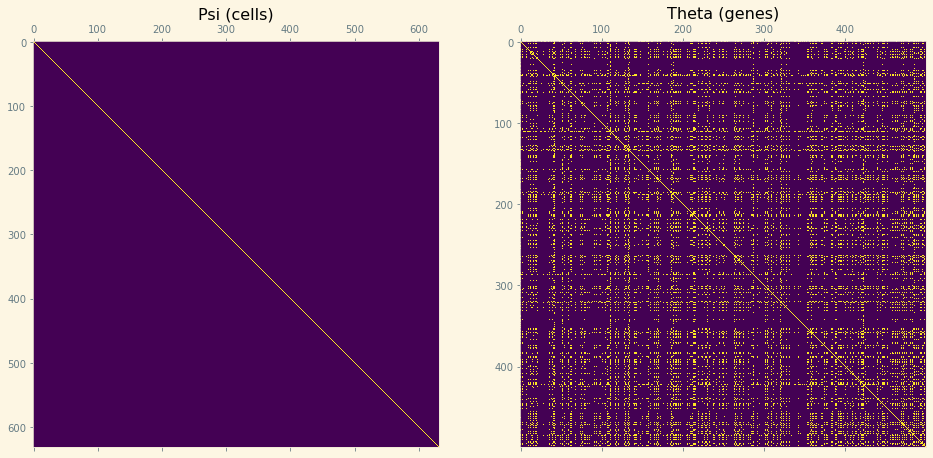

In [62]:
Psi_ = binarize_matrix(Psi, mode='Negative')
np.fill_diagonal(Psi_, 1)
Theta_ = binarize_matrix(Theta, mode='Negative')
np.fill_diagonal(Theta_, 1)

with plt.style.context('Solarize_Light2'):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))
    
    ax1.grid(False)
    ax1.matshow(Psi_)
    ax1.set_title('Psi (cells)')
    
    ax2.matshow(Theta_)
    ax2.grid(False)
    ax2.set_title('Theta (genes)')
    

# EiGLasso

In [29]:
# Note: Matlab interface can't handle views, need to pass a copy
Psi, Theta = EiGLasso(T, S[:500, :500].copy(), beta_1 = 0.4, beta_2 = 0.4)

In [17]:
# Run this if you want to understand the runtime bottlenecks
%lprun -f EiGLasso EiGLasso(T, S[:500, :500].copy(), beta_1 = 0.4, beta_2 = 0.4)

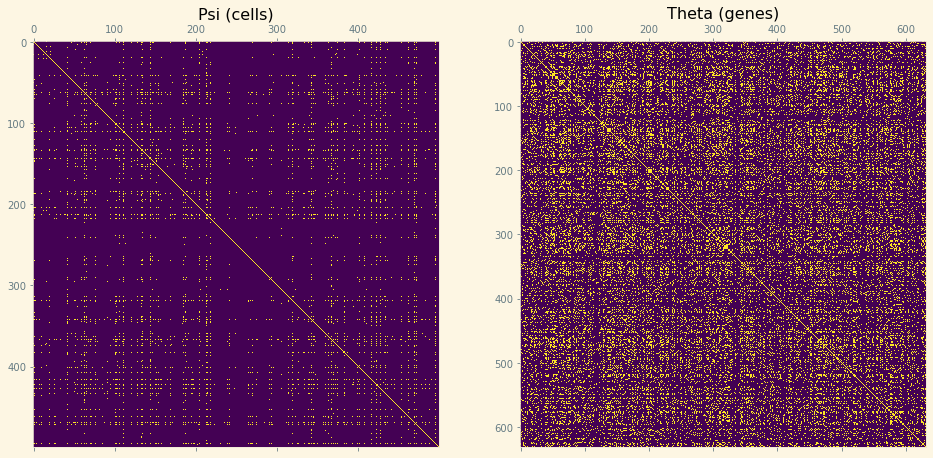

In [31]:

Psi_ = binarize_matrix(Psi, mode='Negative')
np.fill_diagonal(Psi_, 1)
Theta_ = binarize_matrix(Theta, mode='Negative')
np.fill_diagonal(Theta_, 1)

with plt.style.context('Solarize_Light2'):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))
    
    ax1.grid(False)
    ax1.matshow(Psi_)
    ax1.set_title('Psi (cells)')
    
    ax2.matshow(Theta_)
    ax2.grid(False)
    ax2.set_title('Theta (genes)')
    
